<a href="https://colab.research.google.com/github/carolinalcv/predicciones-de-ventas/blob/main/predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/sales_predictions.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#Hay dos columnas con datos faltantes: Item_Weight y Outlet_Size
#Con Item_Weight voy a imputar datos dada la información disponible. 
median_Item_Weight = df["Item_Weight"].median()
df["Item_Weight"].fillna(median_Item_Weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#Con Outlet_Size voy a eliminar la columna debido a que falta el 28% de datos y no es determinante para el análisis. 
df.drop(columns="Outlet_Size", inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [8]:
#Encuentren y arreglen alguna categoría inconsistente de datos
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF", "Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg", "Regular")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat", "Low Fat")
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [10]:
#Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [12]:
df["Item_Outlet_Sales"] = df["Item_Outlet_Sales"].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 732.6+ KB


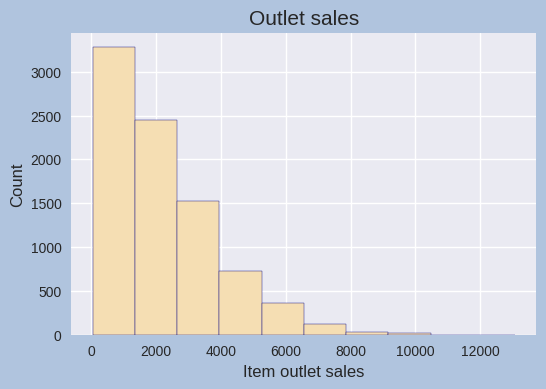

In [14]:
#Histograma para ver las distribuciones de diversas características en el conjunto de datos.
plt.figure(dpi=100, facecolor= "lightsteelblue" ) 
plt.style.use("seaborn")
plt.title("Outlet sales", fontsize = 15)
plt.xlabel("Item outlet sales", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
df["Item_Outlet_Sales"].hist(edgecolor="navy", color="wheat", label= "Outlet type")
plt.show()


In [ ]:
#Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.
item_outlet_sales = df["Item_Outlet_Sales"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([item_outlet_sales],
           notch = True,          
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color="Yellow"),
           boxprops = dict(linestyle='--', linewidth=2, color="Black", facecolor = "blue", alpha = .4)
          );

boxplot1 = boxplots["boxes"][0]
boxplot1.set_facecolor("red")
plt.ylabel("Item outlet sales", fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

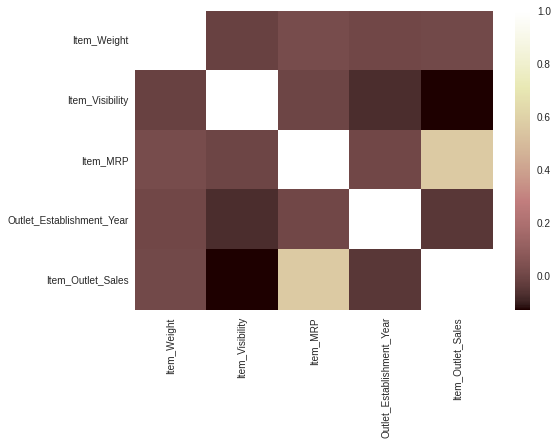

In [16]:
#Mapa de calor de la correlación entre las características.
corr = df.corr()
sns.heatmap(corr, cmap = "pink")

In [ ]:
#Creen un mínimo de dos visualizaciones de datos para ayudar a otros comprender las tendencias en los datos (análisis de datos explicativos).

In [63]:
#visualización 1
#filtro las ventas por tipo de outlet
sales_filter = df.groupby(["Outlet_Type"])["Item_Outlet_Sales"].sum()
sales_filter

Outlet_Type
Grocery Store          367485
Supermarket Type1    12914551
Supermarket Type2     1851354
Supermarket Type3     3453454
Name: Item_Outlet_Sales, dtype: int64

In [71]:
#convierto la serie en dos arrays
unique_type = np.array(sales_filter.index)
unique_type



array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [65]:
unique_sales = np.array(sales_filter.values)
unique_sales

array([  367485, 12914551,  1851354,  3453454])

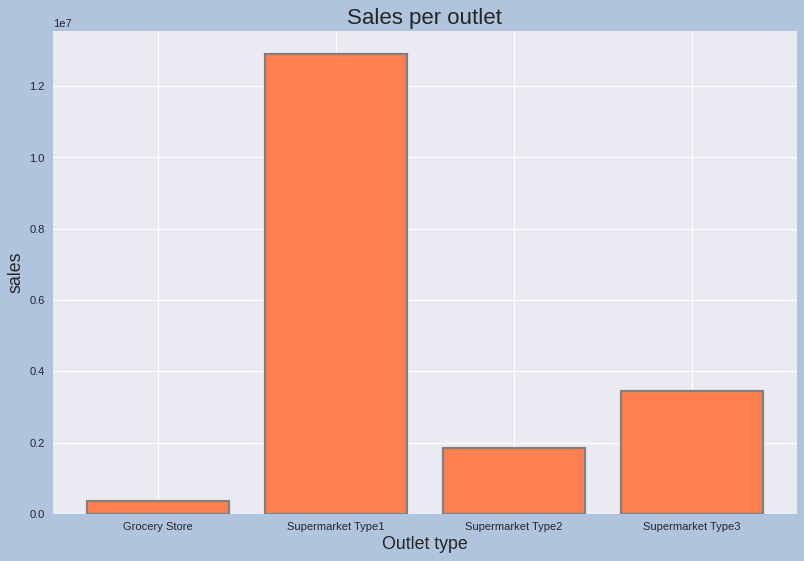

In [66]:
#Visualización de las ventas por tipo de tienda
plt.figure(dpi=80, facecolor= "lightsteelblue", figsize = (12, 8)) 
plt.bar(unique_type, unique_sales, color="coral", edgecolor="gray", linewidth=2)
plt.xlabel("Outlet type",fontsize=16,)
plt.ylabel("sales", fontsize=16)
plt.title("Sales per outlet",fontsize=20)
plt.show()

In [ ]:
#visualización 2


In [70]:
#filtro las ventas por tipo de producto
sales2_filter = df.groupby(["Item_Type"])["Item_Outlet_Sales"].sum()
sales2_filter

Item_Type
Baking Goods             1265198
Breads                    553105
Breakfast                 232245
Canned                   1443824
Dairy                    1522268
Frozen Foods             1825296
Fruits and Vegetables    2819435
Hard Drinks               457685
Health and Hygiene       1044938
Household                2055033
Meat                      917356
Others                    325431
Seafood                   148832
Snack Foods              2732195
Soft Drinks               892670
Starchy Foods             351333
Name: Item_Outlet_Sales, dtype: int64

In [73]:
#convierto la serie en dos arrays
unique_item = np.array(sales2_filter.index)
unique_item

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [75]:
unique_sales2 = np.array(sales2_filter.values)
unique_sales2

array([1265198,  553105,  232245, 1443824, 1522268, 1825296, 2819435,
        457685, 1044938, 2055033,  917356,  325431,  148832, 2732195,
        892670,  351333])

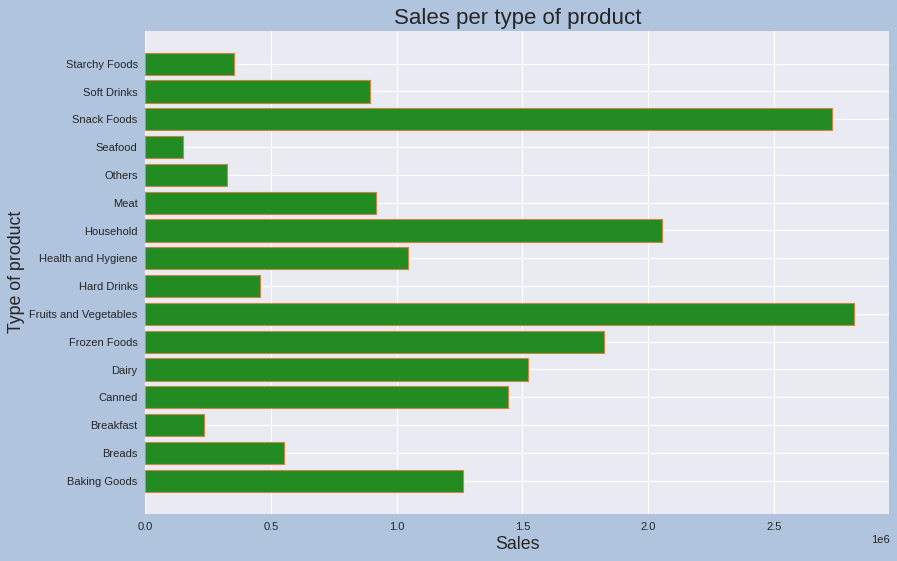

In [86]:
#Visualización de las ventas por tipo de de producto
plt.figure(dpi=80, facecolor= "lightsteelblue", figsize = (12, 8)) 
plt.barh(unique_item, unique_sales2, color="forestgreen", edgecolor="peru", linewidth=1)
plt.xlabel("Sales",fontsize=16,)
plt.ylabel("Type of product", fontsize=16)
plt.title("Sales per type of product",fontsize=20)
plt.show()